In [145]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from pylab import meshgrid

from mpl_toolkits.mplot3d import Axes3D

In [146]:
obj = lambda x, y: ((4-(2.1*x**2)+(x**4)/3)*x**2 + x*y + (-4 + (4*y**2))*y**2)

In [147]:
z = lambda x, y: obj(x,y)**(-1)#1/abs(obj(x, y))

In [148]:
p = lambda f, i: (f[i] / sum(f))

In [149]:
def roulette(fit):
    r = np.random.uniform(0,1)
    indv = 0
    
    while r > 0:
        r -= p(fit,indv)
        
        indv += 1
    print("r:",r)
    return indv-1

In [150]:
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)

    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [151]:
def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 1] = offspring_crossover[idx, 1] + random_value
        
    return offspring_crossover

In [152]:
num_weights = 2

num_parents_mating = 4

population = 20

pop_size = (population, num_weights)

individuals = [[np.random.uniform(-3, 3), np.random.uniform(-2, 2)] for i in range(population)]

individuals = np.array(individuals)

generasi = 300

num_of_parents = 4

In [153]:
individuals

array([[-0.60374166,  0.44063436],
       [-2.84146131, -1.55617751],
       [ 2.08084765,  1.97415772],
       [ 0.16920678, -0.23554009],
       [-2.59262469, -0.35320171],
       [-0.39043372, -1.72118753],
       [-1.17135674,  1.86101886],
       [ 0.51379862, -1.39625219],
       [-2.59261266, -1.66491137],
       [-0.2563971 ,  0.99754625],
       [-1.91115928, -0.94512779],
       [ 0.82250501, -1.8810605 ],
       [-1.21507761,  0.61569106],
       [-0.05583313,  1.38133837],
       [ 2.33258523, -1.45905378],
       [-0.4007602 ,  0.74535637],
       [ 0.08960052,  1.72576122],
       [ 2.82436412,  1.69147839],
       [ 2.22161872, -0.16517551],
       [ 1.72868291, -1.07250248]])

In [154]:
bests = []
for gen in range(generasi):
    fitness = [z(i[0], i[1]) for i in individuals]
    
    print()
    print("generasi",gen+1)
    parents = []
    for i in range(num_of_parents):
        par1 = roulette(fitness)
#         print(par1)
        parents.append(individuals[par1])
#     print("parents:",parents)
    
    parents = np.array(parents)
    
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    offspring_mutation = mutation(offspring_crossover)
    print("offmut",offspring_mutation)
#     print(individuals[parents.shape[0]:, :])

    individuals[0:parents.shape[0], :] = parents
    individuals[parents.shape[0]:, :] = offspring_mutation
    bsf = np.min([obj(i[0], i[1]) for i in individuals])
    idx = np.argmin([obj(i[0], i[1]) for i in individuals],axis=0)
    bests.append(bsf)
    print("Best result : ", bsf, idx)
    
    


generasi 1
r: -0.27785714738048406
r: -0.24672044570065144
r: -0.053429427149781175
r: -0.1988611681924234
offmut [[-0.2563971   0.04878179]
 [-0.2563971   0.11263883]
 [ 0.16920678  0.83197033]
 [-0.2563971   1.76673263]
 [-0.2563971   0.5601829 ]
 [-0.2563971  -1.08372621]
 [ 0.16920678  1.71146342]
 [-0.2563971   1.45924053]
 [-0.2563971   1.84828369]
 [-0.2563971  -0.27341188]
 [ 0.16920678  0.19079967]
 [-0.2563971   1.62029048]
 [-0.2563971   0.72294567]
 [-0.2563971  -0.98329768]
 [ 0.16920678  0.33962844]
 [-0.2563971   1.81594039]]
Best result :  -0.9293319286776985 16

generasi 2
r: -0.40645585504804305
r: -0.2097406578409684
r: -1.0040049609106498
r: -0.511735318425903
offmut [[ 0.16920678 -0.52074434]
 [ 0.16920678 -0.48654491]
 [ 0.16920678 -0.07692961]
 [ 0.16920678 -0.35796325]
 [ 0.16920678  0.64538601]
 [ 0.16920678 -0.30693817]
 [ 0.16920678  0.08280709]
 [ 0.16920678 -0.39520922]
 [ 0.16920678  0.4862436 ]
 [ 0.16920678 -0.52682132]
 [ 0.16920678  0.31757176]
 [ 0.1

offmut [[ 0.16920678 -0.98528952]
 [ 0.16920678  0.52058642]
 [ 0.16920678  0.7493226 ]
 [ 0.16920678 -0.02935465]
 [ 0.16920678  0.74697153]
 [ 0.16920678 -0.77196396]
 [ 0.16920678 -0.2176076 ]
 [ 0.16920678  0.37516274]
 [ 0.16920678  0.84849598]
 [ 0.16920678 -0.2397022 ]
 [ 0.16920678 -0.22595578]
 [ 0.16920678 -0.79577838]
 [ 0.16920678  0.47992405]
 [ 0.16920678 -0.48438259]
 [ 0.16920678 -0.79930209]
 [ 0.16920678 -0.06360511]]
Best result :  -0.9810024153795017 9

generasi 66
r: -0.05846683259288393
r: -0.058596894870890426
r: -0.12188388981034132
r: -0.0468699250826643
offmut [[ 0.16920678 -0.96148024]
 [ 0.16920678  0.05891122]
 [ 0.16920678 -0.27285439]
 [ 0.16920678 -0.82407031]
 [ 0.16920678  0.54868819]
 [ 0.16920678 -0.50028953]
 [ 0.16920678  0.41285194]
 [ 0.16920678  0.76724062]
 [ 0.16920678  0.71021968]
 [ 0.16920678  0.6331759 ]
 [ 0.16920678 -0.44850648]
 [ 0.16920678 -0.80928815]
 [ 0.16920678  0.29273658]
 [ 0.16920678 -0.4632215 ]
 [ 0.16920678 -0.75735448]
 [

Best result :  -0.9281999659957701 16

generasi 104
r: -0.043455277731631964
r: -0.10443514017502234
r: -0.19049602258202264
r: -0.07864790514929726
offmut [[ 0.16920678 -1.11132976]
 [ 0.16920678  0.77982182]
 [ 0.16920678 -1.03226169]
 [ 0.16920678  0.13672445]
 [ 0.16920678 -0.76820962]
 [ 0.16920678 -0.33392067]
 [ 0.16920678  0.06547222]
 [ 0.16920678  0.03617752]
 [ 0.16920678 -0.09239889]
 [ 0.16920678  0.23106621]
 [ 0.16920678  0.25170886]
 [ 0.16920678 -0.63722167]
 [ 0.16920678  0.55214791]
 [ 0.16920678 -1.04069068]
 [ 0.16920678 -0.76362494]
 [ 0.16920678  0.78287426]]
Best result :  -0.9887626237308016 18

generasi 105
r: -0.17043852362883438
r: -0.0055456921043069984
r: -0.1071362621545432
r: -0.17904602793487479
offmut [[ 0.16920678  0.78088345]
 [ 0.16920678  0.3675158 ]
 [ 0.16920678 -0.29263982]
 [ 0.16920678 -0.16072809]
 [ 0.16920678 -0.23374912]
 [ 0.16920678 -0.18871174]
 [ 0.16920678  0.40015825]
 [ 0.16920678 -0.17007364]
 [ 0.16920678  0.3623852 ]
 [ 0.1692067

Best result :  -0.9513429194879547 15

generasi 164
r: -0.08543386296466032
r: -0.19018118889816166
r: -0.20231313265289624
r: -0.09869625611839489
offmut [[ 0.16920678 -0.98078162]
 [ 0.16920678 -0.44747331]
 [ 0.16920678 -0.64894581]
 [ 0.16920678  0.04761973]
 [ 0.16920678  0.53214534]
 [ 0.16920678 -0.09399242]
 [ 0.16920678 -1.01633398]
 [ 0.16920678 -1.11594003]
 [ 0.16920678 -0.69836601]
 [ 0.16920678 -0.52001821]
 [ 0.16920678 -0.76139169]
 [ 0.16920678 -0.99829221]
 [ 0.16920678 -0.23418414]
 [ 0.16920678  0.42616811]
 [ 0.16920678  0.41568909]
 [ 0.16920678 -0.52994992]]
Best result :  -1.0047544586350514 12

generasi 165
r: -0.16815460093294726
r: -0.031807162410532
r: -0.2058222327350378
r: -0.17362242112998366
offmut [[ 0.16920678 -0.78369829]
 [ 0.16920678  0.58673627]
 [ 0.16920678 -0.27518463]
 [ 0.16920678 -0.82606524]
 [ 0.16920678 -0.84526362]
 [ 0.16920678  0.3933523 ]
 [ 0.16920678 -1.05762084]
 [ 0.16920678 -0.97208183]
 [ 0.16920678  0.42061643]
 [ 0.16920678  0.

r: -0.07854372316701541
offmut [[ 0.16920678  0.17073308]
 [ 0.16920678  0.77454389]
 [ 0.16920678  0.19973805]
 [ 0.16920678  0.65905284]
 [ 0.16920678  0.69403452]
 [ 0.16920678 -1.1408783 ]
 [ 0.16920678 -0.47509591]
 [ 0.16920678 -0.93826681]
 [ 0.16920678 -0.3315434 ]
 [ 0.16920678 -0.84412546]
 [ 0.16920678 -0.54616736]
 [ 0.16920678 -0.47756161]
 [ 0.16920678  0.45779446]
 [ 0.16920678 -0.36471457]
 [ 0.16920678  0.31695846]
 [ 0.16920678  0.41939537]]
Best result :  -0.8493153703582098 13

generasi 201
r: -0.06921216318689083
r: -0.2331950598039556
r: -0.06550307342601414
r: -0.02170340131638171
offmut [[ 0.16920678  0.76702307]
 [ 0.16920678 -0.00827295]
 [ 0.16920678  0.28283621]
 [ 0.16920678 -0.1929917 ]
 [ 0.16920678 -0.81104027]
 [ 0.16920678 -0.16356345]
 [ 0.16920678 -0.56129808]
 [ 0.16920678 -1.03794849]
 [ 0.16920678  0.79473238]
 [ 0.16920678 -0.47654677]
 [ 0.16920678  0.52474982]
 [ 0.16920678 -0.22932141]
 [ 0.16920678 -1.02307055]
 [ 0.16920678 -0.66546851]
 [ 0

generasi 265
r: -0.15215028093737998
r: -0.22557643449896453
r: -0.20272424668037958
r: -0.20232007745346314
offmut [[ 0.16920678 -0.88230186]
 [ 0.16920678 -1.06889999]
 [ 0.16920678  0.33747746]
 [ 0.16920678  0.71655676]
 [ 0.16920678  0.07476742]
 [ 0.16920678 -0.28176196]
 [ 0.16920678 -0.62816778]
 [ 0.16920678  0.01550471]
 [ 0.16920678  0.25443478]
 [ 0.16920678  0.45817644]
 [ 0.16920678 -0.73523678]
 [ 0.16920678  0.49748558]
 [ 0.16920678 -0.15104273]
 [ 0.16920678  0.77087578]
 [ 0.16920678 -0.09886961]
 [ 0.16920678  0.53569626]]
Best result :  -1.0050122077897736 14

generasi 266
r: -0.23225113525559338
r: -0.1420124680941287
r: -0.2541304742826461
r: -0.22360682787914232
offmut [[ 0.16920678 -0.13692839]
 [ 0.16920678  0.4255656 ]
 [ 0.16920678  0.39305153]
 [ 0.16920678 -0.09028161]
 [ 0.16920678 -0.15687626]
 [ 0.16920678 -1.01512099]
 [ 0.16920678 -0.19608628]
 [ 0.16920678 -0.0421781 ]
 [ 0.16920678 -0.24919731]
 [ 0.16920678 -0.74692477]
 [ 0.16920678  0.17655273]
 

<IPython.core.display.Javascript object>


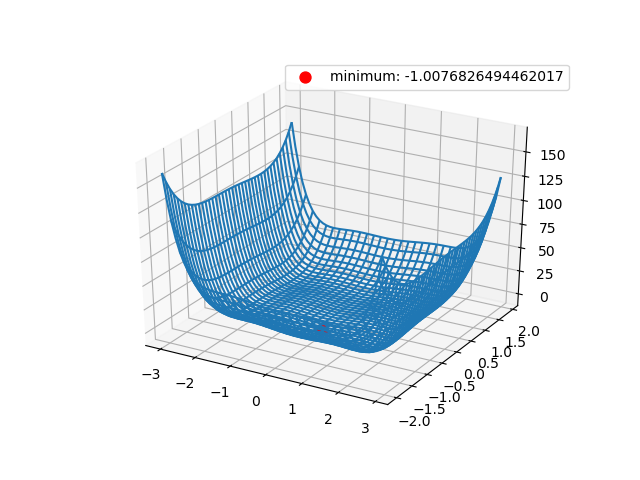

In [155]:
x1m = individuals[idx][0]
x2m = individuals[idx][1]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(121, projection='3d')

#fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(9, 9.6), projection='3d')

x1 = np.arange(-3.0,3.0,0.1)
x2 = np.arange(-2.0,2.0,0.1)
X1,X2 = meshgrid(x1, x2)
Y = z(X1, X2)

Z = obj(X1, X2)


ax1.scatter(xs=[x1m], ys=[x2m], zs=[bsf], s=62, c='#ff0000',label='minimum: '+str(bsf))
ax1.legend()

# ax1.plot_wireframe(X1, X2, Y)

ax1.plot_wireframe(X1, X2, Z)



fig.canvas.draw()
#plt.show(block=False)
plt.ion()

In [156]:
print("x1=",x1m,"x2=",x2m,"minimum found=",bsf)

x1= 0.16920678198435102 x2= -0.7195328182534608 minimum found= -1.0076826494462017
